In [30]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [31]:
data=pd.read_csv('C://Users//Administrator//Desktop//ab테스트//cookie_cats.csv')

In [32]:
data.head(3)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False


### 결측값 확인

In [33]:
print(data.isnull().sum())

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64


In [34]:
data.head(3)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False


In [35]:
data.groupby('version').sum_gamerounds.describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
gate_30,44700.0,52.456264,256.716423,0.0,5.0,17.0,50.0,49854.0
gate_40,45489.0,51.298776,103.294416,0.0,5.0,16.0,52.0,2640.0


gate_30에 3사분위수값이 50이지만 최대값은 49854로 아주 큰 차이가 난다. 이상치를 제거할 필요성이 있다.

Text(0.5, 1.0, 'Distribution of Gate 40 (test group)')

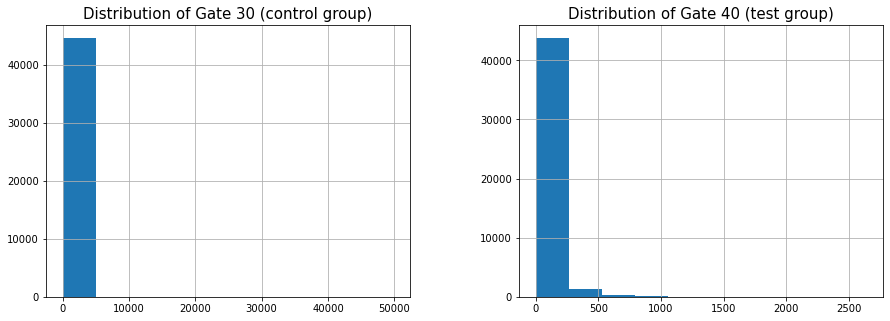

In [36]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
data[data['version']=='gate_30'].hist('sum_gamerounds',ax=axes[0])
data[data['version']=='gate_40'].hist('sum_gamerounds',ax=axes[1])

axes[0].set_title("Distribution of Gate 30 (control group)", fontsize = 15)
axes[1].set_title("Distribution of Gate 40 (test group)", fontsize = 15)

 커널밀도추정

<AxesSubplot:xlabel='sum_gamerounds', ylabel='Density'>

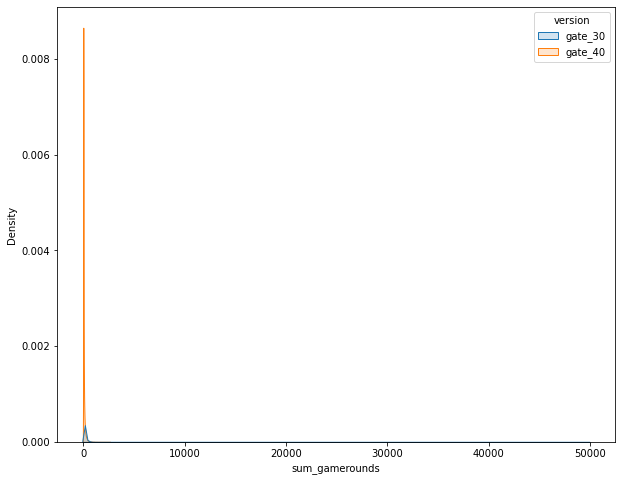

In [37]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.kdeplot(data = data, x = 'sum_gamerounds', ax = ax, hue = 'version', alpha = 0.2, fill = True)


두 그룹간 분포의 차이가 크게 나타난다. 

이상치 제거

In [38]:
data['sum_gamerounds'].sort_values(ascending=False).head(10)

57702    49854
7912      2961
29417     2640
43671     2438
48188     2294
46344     2251
87007     2156
36933     2124
88328     2063
6536      2015
Name: sum_gamerounds, dtype: int64

In [39]:
q1_gr=data['sum_gamerounds'].quantile(q=0.25)
q3_gr=data['sum_gamerounds'].quantile(q=0.75)
print(q1_gr,q3_gr)

5.0 51.0


In [40]:
print(f"이상치 제거 전 :  {data.shape[0]}")
data=data[data.sum_gamerounds<1600]
print(f"이상치 제거 후 :  {data.shape[0]}")

이상치 제거 전 :  90189
이상치 제거 후 :  90170


<AxesSubplot:xlabel='sum_gamerounds', ylabel='Density'>

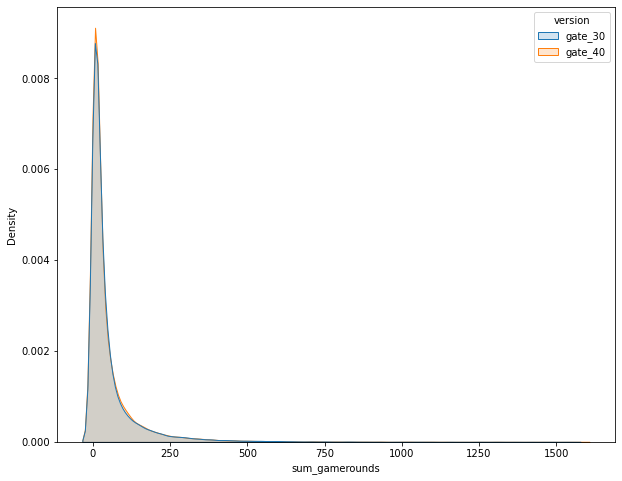

In [13]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.kdeplot(data = data, x = 'sum_gamerounds', ax = ax, hue = 'version', alpha = 0.2, fill = True)


두 그룹의 분포가 비슷해졌다

<AxesSubplot:ylabel='sum_gamerounds'>

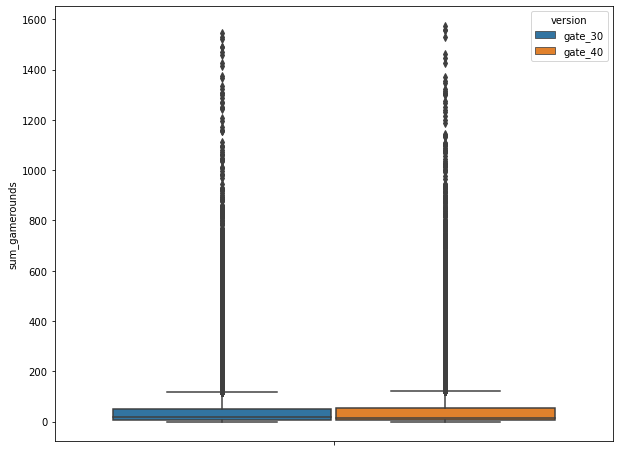

In [41]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(data = data, y = "sum_gamerounds", hue = "version",  x = [""] * len(data))

In [15]:
print(data.groupby("sum_gamerounds").userid.count().head(20))

print(data['sum_gamerounds'].mean())

sum_gamerounds
0     3994
1     5538
2     4606
3     3958
4     3629
5     2992
6     2861
7     2379
8     2267
9     2013
10    1752
11    1654
12    1570
13    1594
14    1519
15    1446
16    1342
17    1269
18    1228
19    1158
Name: userid, dtype: int64
50.9265942109349


In [16]:
print(data.groupby('sum_gamerounds').userid.count().loc[[30,40]])

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64


Text(0.5, 1.0, 'first 150 game rounds')

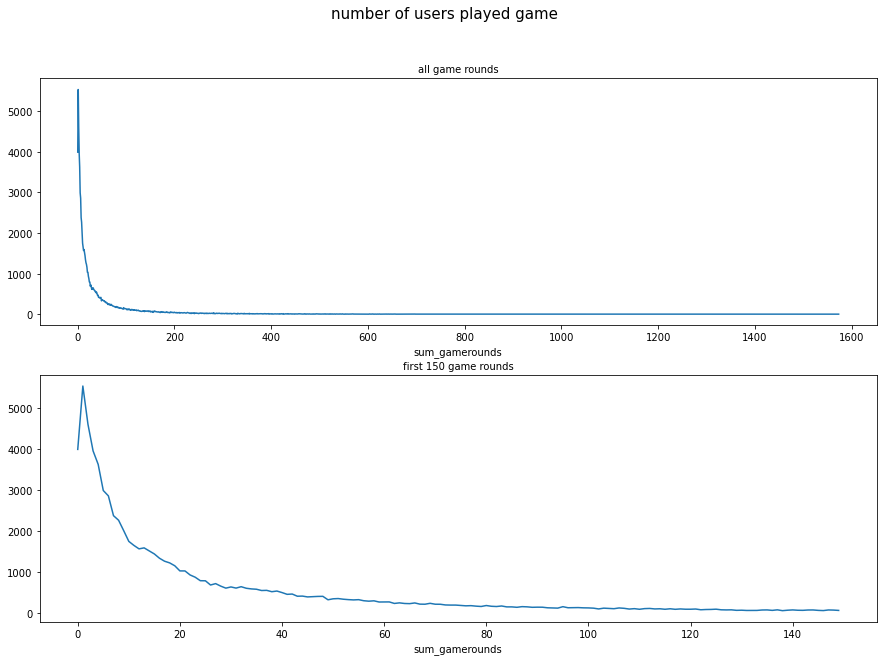

In [17]:
fig, axes = plt.subplots(2, 1, figsize = (15,10))
data.groupby("sum_gamerounds").userid.count().plot(ax = axes[0])
data.groupby("sum_gamerounds").userid.count()[:150].plot(ax = axes[1])
plt.suptitle("number of users played game",fontsize = 15)
axes[0].set_title("all game rounds", fontsize = 10)
axes[1].set_title("first 150 game rounds", fontsize = 10)

#### 게임을 설치했지만 1판도 실행하지 않은 유저들이 3994명이다.
#### 30level까지 진행한 유저는 642명, 40level까지 진행한 유저는 505명이다.
#### 판 수가 진행될수록 유저들이 감소하고 있다.

## 리텐션 

In [18]:
pd.DataFrame({'retention_1day_count':data['retention_1'].value_counts(),'retention_7day_count':data['retention_7'].value_counts(),
             'retention_1day_ratio':data['retention_1'].value_counts()/len(data),
             'retention_7day_ratio':data['retention_7'].value_counts()/len(data)})

,retention_1day_count,retention_7day_count,retention_1day_ratio,retention_7day_ratio
False,50035,73407,0.554896,0.814096
True,40135,16763,0.445104,0.185904


### 게임 설치 후 1일 뒤에도 약 45%의 유저가 플레이하였고, 1주일 뒤에는 19%의 유저가 플레이하였다

In [19]:
data['retention']=list(map(lambda x,y:str(x)+"-"+str(y),data.retention_1,data.retention_7))
data.groupby(['version','retention']).sum_gamerounds.describe()     

count        mean         std  min   25%    50%    75%  \
version retention                                                               
gate_30 False-False  22840.0   11.819746   21.642643  0.0   2.0    6.0   14.0   
        False-True    1825.0   73.169315   93.222330  0.0  19.0   43.0   89.0   
        True-False   13358.0   49.694490   58.125396  0.0  16.0   33.0   60.0   
        True-True     6669.0  181.810466  178.061844  0.0  64.0  127.0  236.0   
gate_40 False-False  23597.0   11.913294   20.901020  0.0   2.0    6.0   14.0   
        False-True    1773.0   75.261139   94.478048  0.0  19.0   47.0   98.0   
        True-False   13612.0   49.835219   56.738060  0.0  16.0   32.0   63.0   
        True-True     6496.0  187.704433  182.691551  0.0  69.0  133.0  242.0   

                        max  
version retention            
gate_30 False-False   981.0  
        False-True   1072.0  
        True-False    918.0  
        True-True    1544.0  
gate_40 False-False   547.0  
        False-True   1241.0  
        True-False   1074.0  
        True-True    1573.0

In [20]:
pd.DataFrame(data.groupby('version').retention.value_counts() *100 /data.groupby('version').retention.count())

retention
version retention             
gate_30 False-False  51.105343
        True-False   29.889018
        True-True    14.922134
        False-True    4.083505
gate_40 False-False  51.886627
        True-False   29.930956
        True-True    14.283830
        False-True    3.898588

#### 대조군(gate_30)에서 설치 후 하루 & 일주일 뒤 플레이한 유저는 gate_30 플레이 유저의 약 15% 정도로 확인되었다.
##### 실험군(gate_40)에서 설치 후 하루 & 일주일 뒤 플레이한 유저는 gate_40 플레이 유저의 약 14% 정도로 대조군에 비해 0.6% 떨어진 수치이다

### a /b test 수행

#### 1) 정규성 확인하기(shapiro-wilk)
##### H0 : sum_gamerounds가 정규분포를 따르며, 결과값은 False     (p-value > alpha)
##### H1 : sum_gamerounds가 정규분포를 따르지않으며, 결과값은 True   (p-value < alpha)

In [22]:
data['version']=np.where(data.version=='gate_30','a','b')
group_a=data[data['version']=='a']['sum_gamerounds'] #대조군
group_b=data[data['version']=='b']['sum_gamerounds'] #실험군

In [23]:
alpha=0.05
statistic_a, pvalue_a = stats.shapiro(group_a)
print(f"gate_30 Shapiro Test Statistic \t {round(statistic_a, 5)}")
print(f"p-value \t {pvalue_a}")  

if pvalue_a <= alpha:
    print("귀무가설을 기각->정규분포를 따르지 않는다")

else :
    print("귀무가설을 기각할 수 없다 -> 정규분포를 따른다. ")
    
    
statistic_b, pvalue_b = stats.shapiro(group_b)
print(f"gate_40 Shapiro Test Statistic \t {round(statistic_b, 5)}")
print(f"p-value \t {pvalue_b}")  

if pvalue_b <= alpha:
    print("귀무가설을 기각->정규분포를 따르지 않는다")

else :
    print("귀무가설을 기각할 수 없다 -> 정규분포를 따른다. ")



gate_30 Shapiro Test Statistic 	 0.51035
p-value 	 0.0
귀무가설을 기각->정규분포를 따르지 않는다
gate_40 Shapiro Test Statistic 	 0.50674
p-value 	 0.0
귀무가설을 기각->정규분포를 따르지 않는다


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### 두 집단 모두 정규분포를 따르지 않으므로  Mann- Whitney U test를 수행한다
#### 2) Mann Whitney U test
##### H0 : 두 집단의 분포가 같다     (p-value > alpha) ->귀무가설 기각X
##### H1 : 두 집단의 분포가 다르다   (p-value < alpha)-> 귀무가설 기각

In [24]:
statistic, pvalue = stats.mannwhitneyu(group_a, group_b)

print(f"Mann Whitney U test statistic is {statistic.round(5)}")
print(f"p-value for Mann Whitney U is {pvalue}")
    
if pvalue <= alpha:
    print('귀무가설을 기각-> 두 집단은 차이가 있다')
else:
    print("귀무가설을 기각할 수 없다-> 두 집단은 동일하다")   

Mann Whitney U test statistic is 1023967360.5
p-value for Mann Whitney U is 0.048251160130628544
귀무가설을 기각-> 두 집단은 차이가 있다


In [28]:
print(data.groupby('version').retention_1.mean())
print(data.groupby('version').retention_7.mean())

version
a    0.448112
b    0.442148
Name: retention_1, dtype: float64
version
a    0.190056
b    0.181824
Name: retention_7, dtype: float64


In [46]:
data

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False
